bold text## Information of Dataset
<b>Titanic Data Set:</b> The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we build a ANN model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

https://www.kaggle.com/c/titanic/data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### Import the Dataset

In [4]:
df = pd.read_csv('/content/train (3).csv')
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###  Data Information and Visualization

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


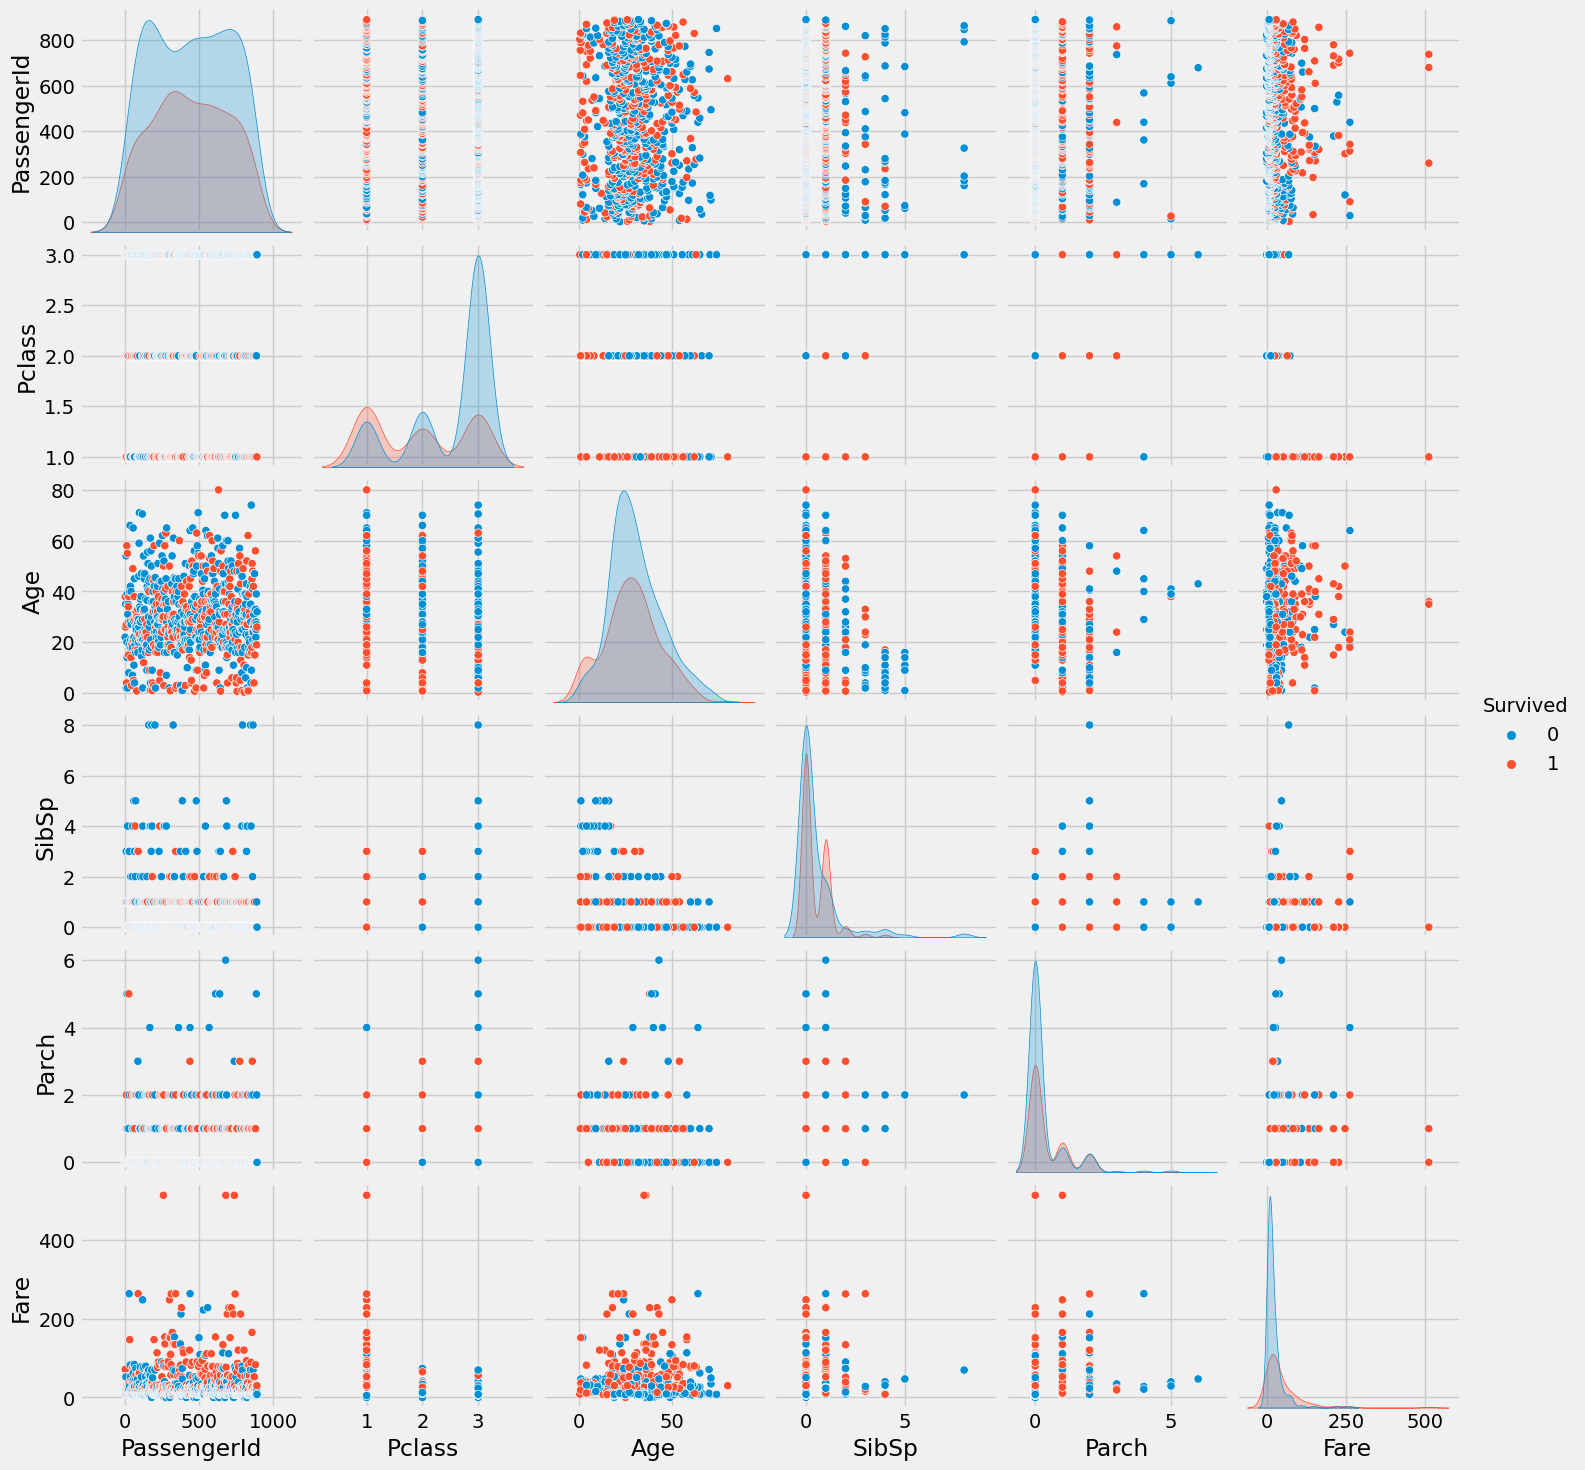

In [ ]:
plt.style.use('fivethirtyeight')
sns.pairplot(df, hue = 'Survived')

#### <font color = blue> Visualize Target Class Label Distributiuon

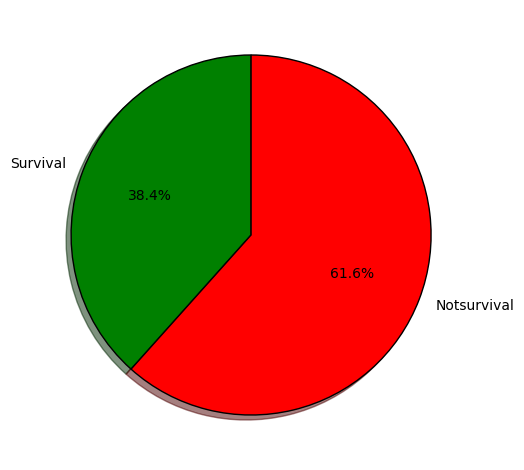

In [9]:
Survival = df[df['Survived'] == 1].shape[0]
Notsurvival = df[df['Survived'] == 0].shape[0]

class_ = [Survival, Notsurvival]
label = ['Survival', 'Notsurvival']

plt.pie(class_, labels = label, shadow = True, wedgeprops = {'edgecolor': 'black'},
        autopct = '%1.1f%%', startangle= 90, colors=['green', 'red'])

plt.tight_layout()
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Drop Unnecessary Cols </font>

In [ ]:
df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


In [ ]:
df.shape

(891, 8)

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Handle Missing Value </font>

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### <font color = blue> Handle Int Col

In [ ]:
# Missing value of age cols
df = df.interpolate(method='nearest')

#### <font color = blue> Handle Obj Col

In [ ]:
# missing value of Embarked cols
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.head().isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Define Predictor and Target Attributes </font>

In [ ]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

#### <font color = blue> Predictor Attributes

In [ ]:
X.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,2,male,27.0,0,0,13.00,S
887,1,female,19.0,0,0,30.00,S
888,3,female,19.0,1,2,23.45,S
889,1,male,26.0,0,0,30.00,C
890,3,male,32.0,0,0,7.75,Q


#### <font color = blue> Target Attribute

In [ ]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> One Hot Encoder (Sex, Embarked) </font>

In [ ]:
X = pd.get_dummies(X,drop_first = True)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Split the Data into Training and Testing </font>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)

#### <font color = blue> Training Data

In [ ]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

X_train (712, 8)
Y_train (712,)


#### <font color = blue> Testing Data

In [ ]:
print("X_test", X_test.shape)
print("X_test", Y_test.shape)

X_test (179, 8)
X_test (179,)


![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



```
# This is formatted as code
```

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build Artificial Neural Network </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Implementation with Keras</font>

#### <font color = blue> Import Libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Dropout
from scikeras.wrappers import KerasClassifier

#### <font color = blue> Build Model

In [ ]:
def build_ANN():
    # Initialize our ANN model
    ANN_Keras = Sequential()

    # Add the input layer and first hidden layer with Dropout
    ANN_Keras.add(Dense(5,  kernel_initializer = 'uniform', activation = 'relu' , input_dim = 8))
    # ANN_Keras.add(Dropout(rate = 0.1))

    # Adding the Second Hidden layer with Dropout
    ANN_Keras.add(Dense(5, kernel_initializer= 'uniform', activation = 'relu'))
    # ANN_Keras.add(Dropout(rate = 0.1))

    # Adding the output layer
    ANN_Keras.add(Dense(1, kernel_initializer= 'uniform', activation = 'sigmoid'))

    # Compiling the ANN
    ANN_Keras.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ANN_Keras

ANN_Keras = KerasClassifier(model= build_ANN, batch_size = 10, epochs = 100)
Accuracies_Train_Data = cross_val_score(estimator = ANN_Keras, X = X_train, y = Y_train, cv = 10, n_jobs= -1)
Accuracies_Train_Data

array([0.80555556, 0.73611111, 0.81690141, 0.8028169 , 0.74647887,
       0.8028169 , 0.8028169 , 0.81690141, 0.8028169 , 0.8028169 ])

#### <font color = blue> Predict the Test Data

In [ ]:
Y_pred_keras = cross_val_predict(ANN_Keras, X_test, Y_test, cv = 10)

Epoch 1/100
17/17 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.6025
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.6273
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6908 - accuracy: 0.6646
Epoch 4/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.6646
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6842 - accuracy: 0.6894
Epoch 6/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6773 - accuracy: 0.7019
Epoch 7/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6738 - accuracy: 0.7019
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6659 - accuracy: 0.6646
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6619 - accuracy: 0.7019
Epoch 10/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6503 - accuracy: 0.7081
Epoch 11/

17/17 [==============================] - 0s 3ms/step - loss: 0.5248 - accuracy: 0.7516
Epoch 84/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5291 - accuracy: 0.7453
Epoch 85/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7267
Epoch 86/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5487 - accuracy: 0.7640
Epoch 87/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5461 - accuracy: 0.7516
Epoch 88/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7516
Epoch 89/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.7329
Epoch 90/100
17/17 [==============================] - 0s 5ms/step - loss: 0.5313 - accuracy: 0.7516
Epoch 91/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.7702
Epoch 92/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5161 - accuracy: 0.7578
Epoch 93/100


17/17 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.7205
Epoch 46/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.7143
Epoch 47/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5583 - accuracy: 0.7019
Epoch 48/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.7205
Epoch 49/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5692 - accuracy: 0.7267
Epoch 50/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.7143
Epoch 51/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.7516
Epoch 52/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7453
Epoch 53/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5538 - accuracy: 0.7329
Epoch 54/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5515 - accuracy: 0.7516
Epoch 55/100


17/17 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7081
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6362 - accuracy: 0.7205
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6957
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.7205
Epoch 11/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7391
Epoch 12/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5851 - accuracy: 0.7329
Epoch 13/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5788 - accuracy: 0.7267
Epoch 14/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5717 - accuracy: 0.7267
Epoch 15/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5475 - accuracy: 0.7391
Epoch 16/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5809 - accuracy: 0.7516
Epoch 17/100
17

17/17 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7950
Epoch 90/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4821 - accuracy: 0.7702
Epoch 91/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7826
Epoch 92/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4537 - accuracy: 0.7826
Epoch 93/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4577 - accuracy: 0.7764
Epoch 94/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4547 - accuracy: 0.7764
Epoch 95/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4634 - accuracy: 0.7950
Epoch 96/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4702 - accuracy: 0.8075
Epoch 97/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.7888
Epoch 98/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7578
Epoch 99/100


17/17 [==============================] - 0s 3ms/step - loss: 0.5450 - accuracy: 0.7578
Epoch 52/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5397 - accuracy: 0.7578
Epoch 53/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5552 - accuracy: 0.7267
Epoch 54/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5466 - accuracy: 0.7516
Epoch 55/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5562 - accuracy: 0.7329
Epoch 56/100
17/17 [==============================] - 0s 4ms/step - loss: 0.5502 - accuracy: 0.7578
Epoch 57/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.7081
Epoch 58/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.7329
Epoch 59/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5702 - accuracy: 0.7267
Epoch 60/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5554 - accuracy: 0.7329
Epoch 61/100


17/17 [==============================] - 0s 3ms/step - loss: 0.6008 - accuracy: 0.7019
Epoch 14/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.7019
Epoch 15/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.6832
Epoch 16/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.7081
Epoch 17/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.6770
Epoch 18/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5888 - accuracy: 0.7143
Epoch 19/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5837 - accuracy: 0.7267
Epoch 20/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7019
Epoch 21/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.6646
Epoch 22/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7143
Epoch 23/100


17/17 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7081
Epoch 96/100
17/17 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7081
Epoch 97/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4846 - accuracy: 0.7391
Epoch 98/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7143
Epoch 99/100
17/17 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7267
Epoch 100/100
2/2 [==============================] - 0s 3ms/step
Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 0.6927 - accuracy: 0.5926
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6910 - accuracy: 0.6111
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.6111
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.6111
Epoch 5/100
17/17 [==============================] -

In [ ]:
Y_pred_keras

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

#### <font color = blue> Accuracy Score

In [ ]:
Accuracy_Keras = cross_val_score(ANN_Keras, X = X_test, y = Y_test, cv = 10)

Epoch 1/100
17/17 [==============================] - 1s 4ms/step - loss: 0.6932 - accuracy: 0.4783
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.6149
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6913 - accuracy: 0.6149
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.6149
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.6149
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.6149
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.6149
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.6149
Epoch 9/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.6149
Epoch 10/100
17/17 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.6149
Epoch 11/

17/17 [==============================] - 0s 4ms/step - loss: 0.5581 - accuracy: 0.6832
Epoch 84/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5679 - accuracy: 0.6957
Epoch 85/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5433 - accuracy: 0.7081
Epoch 86/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.6832
Epoch 87/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7143
Epoch 88/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5471 - accuracy: 0.6957
Epoch 89/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.6832
Epoch 90/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5594 - accuracy: 0.6894
Epoch 91/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5687 - accuracy: 0.6894
Epoch 92/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5831 - accuracy: 0.6708
Epoch 93/100


17/17 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.7267
Epoch 46/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7329
Epoch 47/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7267
Epoch 48/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7453
Epoch 49/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5816 - accuracy: 0.7391
Epoch 50/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.7453
Epoch 51/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5736 - accuracy: 0.7329
Epoch 52/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.7453
Epoch 53/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5647 - accuracy: 0.7329
Epoch 54/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5926 - accuracy: 0.7143
Epoch 55/100


17/17 [==============================] - 0s 2ms/step - loss: 0.6850 - accuracy: 0.6832
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6827 - accuracy: 0.6584
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6767 - accuracy: 0.7081
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.7267
Epoch 11/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6658 - accuracy: 0.6957
Epoch 12/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6630 - accuracy: 0.6957
Epoch 13/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6625 - accuracy: 0.6646
Epoch 14/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6480 - accuracy: 0.7143
Epoch 15/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6894
Epoch 16/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6446 - accuracy: 0.6957
Epoch 17/100
17

17/17 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.7205
Epoch 90/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5731 - accuracy: 0.7081
Epoch 91/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5341 - accuracy: 0.7267
Epoch 92/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5871 - accuracy: 0.7081
Epoch 93/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7391
Epoch 94/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5623 - accuracy: 0.7205
Epoch 95/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7516
Epoch 96/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5424 - accuracy: 0.7267
Epoch 97/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7143
Epoch 98/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5907 - accuracy: 0.7081
Epoch 99/100


17/17 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7267
Epoch 52/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7143
Epoch 53/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5214 - accuracy: 0.7516
Epoch 54/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7205
Epoch 55/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5524 - accuracy: 0.7329
Epoch 56/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7640
Epoch 57/100
17/17 [==============================] - 0s 2ms/step - loss: 0.5282 - accuracy: 0.7516
Epoch 58/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5363 - accuracy: 0.7516
Epoch 59/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.7205
Epoch 60/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5155 - accuracy: 0.7453
Epoch 61/100


17/17 [==============================] - 0s 3ms/step - loss: 0.6401 - accuracy: 0.6149
Epoch 14/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6435 - accuracy: 0.6149
Epoch 15/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6352 - accuracy: 0.6149
Epoch 16/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.6149
Epoch 17/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6320 - accuracy: 0.6149
Epoch 18/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.6149
Epoch 19/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6295 - accuracy: 0.6149
Epoch 20/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6266 - accuracy: 0.6149
Epoch 21/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.6149
Epoch 22/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6149
Epoch 23/100


17/17 [==============================] - 0s 3ms/step - loss: 0.5183 - accuracy: 0.7453
Epoch 96/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5213 - accuracy: 0.7578
Epoch 97/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5467 - accuracy: 0.7391
Epoch 98/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7516
Epoch 99/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5049 - accuracy: 0.7516
Epoch 100/100
2/2 [==============================] - 0s 5ms/step
Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 0.6934 - accuracy: 0.4877
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.6296
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.6358
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.6914
Epoch 5/100
17/17 [==============================] -

In [ ]:
Accuracy_Keras = Accuracy_Keras.mean()
print('Accuracy Score:', Accuracy_Keras)

Accuracy Score: 0.7545751633986928


## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<AxesSubplot:>

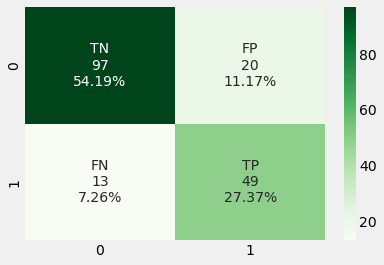

In [ ]:
confusion_matrix = confusion_matrix(Y_pred_Sklearn, Y_test)

#[row, column]
TP = confusion_matrix[1, 1]
TN = confusion_matrix[0, 0]
FP = confusion_matrix[0, 1]
FN = confusion_matrix[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Greens')

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

#### <font color = blue>4.2.1: Calculate the Results

In [ ]:
# Accuracy Score
Accuracy = accuracy_score(Y_pred_Sklearn, Y_test)
print('Accuracy Score:', Accuracy)

# Precision Score
Precision = precision_score(Y_pred_Sklearn, Y_test)
print('Precision Score:', Precision)

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(Y_pred_Sklearn, Y_test)
print('True positive Rate:', TPR)

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)

# F1 Score or F-Measure or F-Score
F1 = f1_score(Y_pred_Sklearn, Y_test)
print('F1 Score:', F1)

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )

# Mean Absolute Error
Error = mean_absolute_error(Y_pred_Sklearn, Y_test)
print('Mean Absolute Error:', Error)

# ROC Area
Roc = roc_auc_score(Y_pred_Sklearn, Y_test)
print('ROC Area:', Roc)

Accuracy Score: 0.8156424581005587
Precision Score: 0.7101449275362319
True positive Rate: 0.7903225806451613
False positive Rate 0.17094017094017094
F1 Score: 0.7480916030534351
Specificity: 0.8290598290598291
Mean Absolute Error: 0.18435754189944134
ROC Area: 0.8096912048524951


#### <font color = blue>4.2.2: Visualize the Results

<BarContainer object of 8 artists>

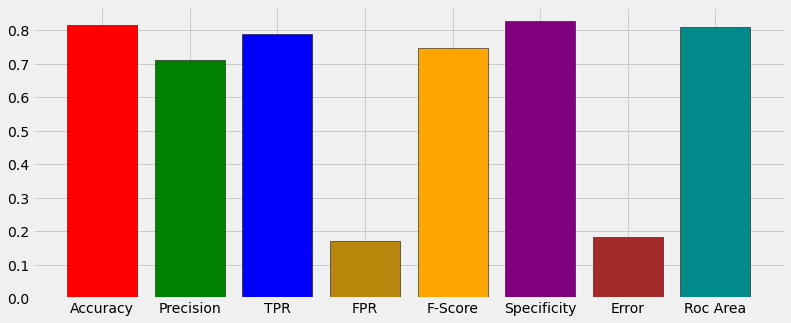

In [ ]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error, Roc]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error", "Roc Area"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown', 'darkcyan']

plt.bar(label, result, color = colors, edgecolor='black')

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #545CFF> Part 5: </font> <font color = #5567E9> Making A Single Prediction </font>

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

In [ ]:
new_prediction = ANN_Sklearn.predict(np.array([[3, 36.0, 1, 2, 24.2345, 1, 1, 1]]))

In [ ]:
if new_prediction == 1:
    print("Survived")
else:
    print("Not Survived")

Not Survived


<b>Created By : </b>Sai varun